In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

In [11]:
data = pd.read_csv('Documents/cardekho.csv', sep=",")

In [12]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 8128


In [13]:
data.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

In [14]:
cat_temp_data = data[['max_power']]
cat_temp_data.head()

,max_power
0,74
1,103.52
2,78
3,90
4,88.2


In [15]:
cat_temp_data['max_power'].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', nan, '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85', '81.8',
       '73', '120', '94.68', '160', '65', '155', '69.01', '126.32',
       '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188', '214.56',
       '177', '280', '148.31', '254.79', '190', '177.46', '204', '141',
       '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5', '183',
       '181.04', '157.7', '164.7', '91.1', '400', '68', '75', '85.8',
       '87.2', '53', '118', '103.2', '83', '84', '58.16', '147.94',
   

In [16]:
cat_temp_data[cat_temp_data['max_power'].isnull()].shape

(215, 1)

In [17]:
def convert_float(x):
    try:
        return float(x)
    except:
        return np.nan

In [18]:
data["max_power"] = data["max_power"].apply(convert_float)
data['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8128, dtype: float64

In [19]:
missing = ["mileage(km/ltr/kg)", "engine", "max_power", "seats"]
for i in missing:
    data[i].fillna(data[i].median(), inplace=True)

In [20]:
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

name - 0
year - 0
selling_price - 0
km_driven - 0
fuel - 0
seller_type - 0
transmission - 0
owner - 0
mileage(km/ltr/kg) - 0
engine - 0
max_power - 0
seats - 0


In [21]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [23]:
data.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.00000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.415554,1452.89813,91.264982,5.405389
std,4.044249,8.062534e+05,5.655055e+04,3.981922,498.19672,35.376388,0.948874
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.00000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.00000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.00000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1582.00000,101.250000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.00000,400.000000,14.000000


In [25]:
data.shape

(8128, 12)

In [86]:
X = data[['engine', 'max_power', 'seats', 'km_driven', 'mileage(km/ltr/kg)']]

In [64]:
y = data[['selling_price']]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [66]:
# Размер обучающей выборки
X_train.shape, y_train.shape

((5689, 3), (5689, 3))

In [67]:
# Размер тестовой выборки
X_test.shape, y_test.shape

((2439, 3), (2439, 3))

In [68]:
# 2 ближайших соседа
reg1_1 = KNeighborsRegressor(n_neighbors=2)
reg1_1.fit(X_train, y_train)
target2_1 = reg1_1.predict(X_test)
len(target2_1), target2_1

(2439,
 array([[1687.5  ,  104.05 ,    6.   ],
        [2179.   ,  146.93 ,    7.   ],
        [1373.   ,   93.545,    5.   ],
        ...,
        [ 805.   ,   51.25 ,    5.   ],
        [1290.5  ,   77.9  ,    5.   ],
        [2574.   ,  159.505,    7.5  ]]))

In [69]:
# 10 ближайших соседей
reg1_2 = KNeighborsRegressor(n_neighbors=10)
reg1_2.fit(X_train, y_train)
target2_2 = reg1_2.predict(X_test)
len(target2_2), target2_2

(2439,
 array([[1295.7  ,   76.622,    5.2  ],
        [1845.4  ,  132.978,    6.3  ],
        [1768.   ,   99.988,    6.   ],
        ...,
        [ 973.6  ,   58.19 ,    5.9  ],
        [1309.3  ,   77.485,    5.   ],
        [2040.5  ,  152.541,    5.8  ]]))

In [70]:
mean_absolute_error(y_test, target2_1)

86.40911199945334

In [71]:
mean_absolute_error(y_test, target2_2)

87.91589702063699

In [94]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.datasets import load_iris

In [95]:
iris = load_iris()

In [96]:
# Возвращаются индексы элементов
x = ["a", "b", "c"]
kf = KFold(n_splits=3)
for train, test in kf.split(x):
    print("%s %s" % (train, test))

[1 2] [0]
[0 2] [1]
[0 1] [2]


In [97]:
x = range(12)
kf = KFold(n_splits=3)
for train, test in kf.split(x):
    print("%s %s" % (train, test))

[ 4  5  6  7  8  9 10 11] [0 1 2 3]
[ 0  1  2  3  8  9 10 11] [4 5 6 7]
[0 1 2 3 4 5 6 7] [ 8  9 10 11]


In [98]:
kf = KFold(n_splits=5)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         iris.data, iris.target, scoring='f1_weighted', 
                         cv=kf)
scores

array([1.        , 1.        , 0.94736842, 0.90246769, 0.84615385])

In [100]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

In [101]:
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        iris.data, iris.target, scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

{'fit_time': array([0.00200033, 0.00400043, 0.01562381, 0.        , 0.        ]),
 'score_time': array([0.01741743, 0.03534889, 0.        , 0.01562595, 0.01562476]),
 'test_precision': array([1.        , 1.        , 1.        , 0.92307692, 1.        ]),
 'train_precision': array([0.97641509, 0.97674419, 0.99206349, 0.98412698, 0.98397436]),
 'test_recall': array([1.        , 1.        , 0.9       , 0.9       , 0.73333333]),
 'train_recall': array([0.975     , 0.975     , 0.99166667, 0.98333333, 0.98333333]),
 'test_f1': array([1.        , 1.        , 0.94736842, 0.90246769, 0.84615385]),
 'train_f1': array([0.97497748, 0.97506521, 0.99172621, 0.98324923, 0.98305814])}

In [102]:
x = range(12)
# Эквивалент KFold(n_splits=n)
kf = ShuffleSplit(n_splits=5, test_size=0.25)
for train, test in kf.split(x):
    print("%s %s" % (train, test))

[ 6  1  9  4 10  2  5  0 11] [3 7 8]
[11  7  6  9  3  2  8 10  0] [5 4 1]
[ 2 10  8 11  1  6  4  7  0] [5 9 3]
[ 8 11  9  4  2  0  5  1 10] [6 3 7]
[10  2  4  9  3  7  1  6  5] [11  8  0]


In [103]:
kf = ShuffleSplit(n_splits=5, test_size=0.25)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        iris.data, iris.target, scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

{'fit_time': array([0.00099301, 0.        , 0.00100327, 0.        , 0.        ]),
 'score_time': array([0.02149701, 0.        , 0.01514482, 0.01562119, 0.        ]),
 'test_precision': array([0.95394737, 0.90712074, 0.92397661, 0.9754386 , 0.94736842]),
 'train_precision': array([0.98316327, 0.97517422, 0.98301394, 0.97527473, 0.98305861]),
 'test_recall': array([0.94736842, 0.86842105, 0.92105263, 0.97368421, 0.94736842]),
 'train_recall': array([0.98214286, 0.97321429, 0.98214286, 0.97321429, 0.98214286]),
 'test_f1': array([0.94747807, 0.8640999 , 0.92170202, 0.9736506 , 0.94736842]),
 'train_f1': array([0.98215036, 0.97315698, 0.98206845, 0.9731677 , 0.98214888])}

In [104]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [107]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris.data, iris.target, test_size=0.5, random_state=1)

In [108]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(iris_X_train, iris_y_train)

CPU times: total: 375 ms
Wall time: 658 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [109]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00188899, 0.01032243, 0.00590968, 0.00040002, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'std_fit_time': array([0.00070385, 0.01627464, 0.00544423, 0.00048992, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'mean_score_time': array([0.00814052, 0.01204047, 0.01100659, 0.00481267, 0.0031291 ,
        0.05462151, 0.        , 0.00312591, 0.00312433, 0.00312519]),
 'std_score_time': array([0.0029749 , 0.00425693, 0.00549901, 0.00574927, 0.0062582 ,
        0.1016044 , 0.        , 0.00625181, 0.00624866, 0.00625038]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neighbors': 30},
  {'n_neigh

In [110]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier()

In [111]:
# Лучшее значение метрики
clf_gs.best_score_

0.9733333333333334

In [112]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 5}

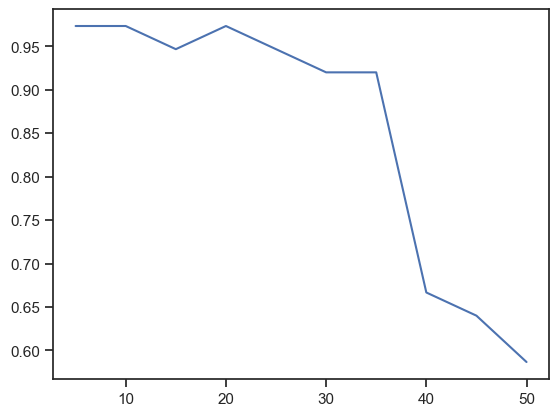

In [113]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [114]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_rs.fit(iris_X_train, iris_y_train)

CPU times: total: 312 ms
Wall time: 303 ms


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   scoring='accuracy')

In [115]:
clf_rs.best_score_, clf_rs.best_params_

(0.9733333333333334, {'n_neighbors': 5})

In [116]:
clf_gs.best_score_, clf_gs.best_params_

(0.9733333333333334, {'n_neighbors': 5})